In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-78.30928152334353, -39.0772113238699),
 (-62.538971098277855, 119.62695449498898),
 (-63.46678120477518, -47.62091983567524),
 (16.059614083181955, 135.1811110004743),
 (89.95099492639241, -113.7237138512136),
 (-23.367315947990022, 102.54521963196277),
 (11.59565061646623, 71.3666908096341),
 (-68.05411423379513, 111.28172161554545),
 (-69.06305054662934, 56.6042140873526),
 (-13.554319861046537, 1.3949683750894906),
 (22.20697325315608, -177.87257722399494),
 (-55.23350864705721, -102.37266292157115),
 (-15.244022081708096, 21.494972809485517),
 (-28.399075124053034, 72.82821428679839),
 (-26.394216901995293, 84.68205416455157),
 (-54.388275913164485, -124.63901858368062),
 (9.156895759372489, 151.3084681582671),
 (67.54173431271693, -25.216252694141218),
 (-8.739243845073986, 50.88822775317405),
 (80.1786198016008, 149.14846941714694),
 (18.890928953466144, -67.33276711086745),
 (-20.24702622340385, -79.82383832901485),
 (28.52277878455662, -148.8042198347525),
 (-21.085160597638

In [5]:
from citipy import citipy

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | kalabo
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 1 | ambilobe
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | aguadilla
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | hilo
Processing Record 22 o

Processing Record 34 of Set 4 | novo cruzeiro
Processing Record 35 of Set 4 | tautira
Processing Record 36 of Set 4 | mansfield
Processing Record 37 of Set 4 | torres
Processing Record 38 of Set 4 | scarborough
Processing Record 39 of Set 4 | atuona
Processing Record 40 of Set 4 | salvador
Processing Record 41 of Set 4 | berlevag
Processing Record 42 of Set 4 | hihifo
City not found. Skipping...
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | tandil
Processing Record 45 of Set 4 | vestmannaeyjar
Processing Record 46 of Set 4 | lishui
Processing Record 47 of Set 4 | ajdabiya
Processing Record 48 of Set 4 | niefern-oschelbronn
Processing Record 49 of Set 4 | valparaiso
Processing Record 50 of Set 4 | ishigaki
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | cairns
Processing Record 3 of Set 5 | ust-maya
Processing Record 4 of Set 5 | neosho
Processing Record 5 of Set 5 | belmonte
Processing Record 6 of

Processing Record 25 of Set 8 | prado
Processing Record 26 of Set 8 | rio gallegos
Processing Record 27 of Set 8 | stephenville
Processing Record 28 of Set 8 | reconquista
Processing Record 29 of Set 8 | palu
Processing Record 30 of Set 8 | alice springs
Processing Record 31 of Set 8 | krasnoarmeysk
Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | kahului
Processing Record 34 of Set 8 | shihezi
Processing Record 35 of Set 8 | gouyave
Processing Record 36 of Set 8 | puri
Processing Record 37 of Set 8 | adre
Processing Record 38 of Set 8 | alyangula
Processing Record 39 of Set 8 | bitung
Processing Record 40 of Set 8 | ahipara
Processing Record 41 of Set 8 | zapolyarnyy
Processing Record 42 of Set 8 | ronneby
Processing Record 43 of Set 8 | wanxian
Processing Record 44 of Set 8 | gigmoto
Processing Record 45 of Set 8 | halifax
Processing Record 46 of Set 8 | samusu
City not found. Skipping...
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | 

Processing Record 17 of Set 12 | pangnirtung
Processing Record 18 of Set 12 | karratha
Processing Record 19 of Set 12 | winton
Processing Record 20 of Set 12 | waipawa
Processing Record 21 of Set 12 | uruacu
Processing Record 22 of Set 12 | pisco
Processing Record 23 of Set 12 | laguna de perlas
Processing Record 24 of Set 12 | kathu
Processing Record 25 of Set 12 | gwadar
Processing Record 26 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 27 of Set 12 | udachnyy
Processing Record 28 of Set 12 | kailua
Processing Record 29 of Set 12 | bud
Processing Record 30 of Set 12 | freetown
Processing Record 31 of Set 12 | belyy yar
Processing Record 32 of Set 12 | marzuq
Processing Record 33 of Set 12 | wajima
Processing Record 34 of Set 12 | yantongshan
Processing Record 35 of Set 12 | sokolovyy
Processing Record 36 of Set 12 | kalmunai
Processing Record 37 of Set 12 | liure
Processing Record 38 of Set 12 | islamkot
Processing Record 39 of Set 12 | la ronge
Processing Record 40 of Set 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.62,93,100,6.91,AR,2022-04-02 15:35:09
1,Albany,42.6001,-73.9662,42.94,48,4,3.00,US,2022-04-02 15:31:51
2,Airai,-8.9266,125.4092,57.76,87,16,1.90,TL,2022-04-02 15:35:35
3,Yellowknife,62.4560,-114.3525,-8.72,82,75,4.61,CA,2022-04-02 15:35:35
4,Carnarvon,-24.8667,113.6333,77.07,88,4,5.75,AU,2022-04-02 15:25:39
5,Kavaratti,10.5669,72.6420,83.50,70,40,7.70,IN,2022-04-02 15:29:23
6,Jamestown,42.0970,-79.2353,40.01,53,40,3.44,US,2022-04-02 15:35:11
7,Kapaa,22.0752,-159.3190,71.92,90,40,18.41,US,2022-04-02 15:35:14
8,Castro,-24.7911,-50.0119,64.40,82,100,8.86,BR,2022-04-02 15:35:36
9,Kalabo,-14.9700,22.6814,75.97,62,94,3.83,ZM,2022-04-02 15:34:15


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

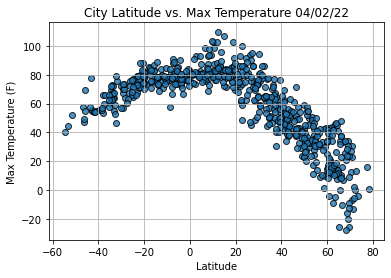

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

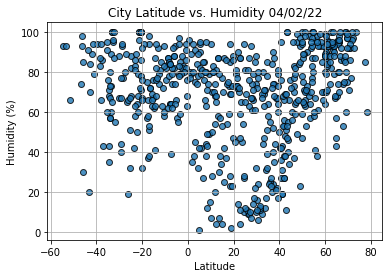

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

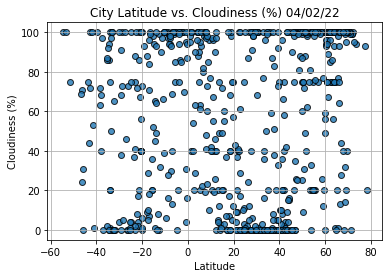

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

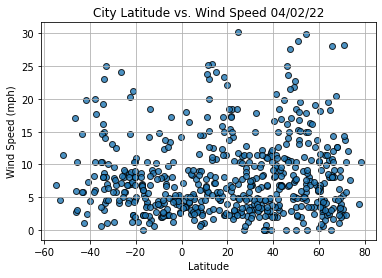

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Albany,42.6001,-73.9662,42.94,48,4,3.00,US,2022-04-02 15:31:51
3,Yellowknife,62.4560,-114.3525,-8.72,82,75,4.61,CA,2022-04-02 15:35:35
5,Kavaratti,10.5669,72.6420,83.50,70,40,7.70,IN,2022-04-02 15:29:23
6,Jamestown,42.0970,-79.2353,40.01,53,40,3.44,US,2022-04-02 15:35:11
7,Kapaa,22.0752,-159.3190,71.92,90,40,18.41,US,2022-04-02 15:35:14
...,...,...,...,...,...,...,...,...,...
584,Krasnyy Chikoy,50.3643,108.7512,26.55,89,9,2.28,RU,2022-04-02 15:50:59
585,Sinjar,36.3209,41.8754,71.20,27,59,2.10,IQ,2022-04-02 15:50:59
586,El Carrizo,24.0261,-106.8814,75.09,54,10,2.26,MX,2022-04-02 15:50:59
587,Ixtapa,20.7000,-105.2000,80.80,45,43,2.24,MX,2022-04-02 15:50:28


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Albany,42.6001,-73.9662,42.94,48,4,3.00,US,2022-04-02 15:31:51
3,Yellowknife,62.4560,-114.3525,-8.72,82,75,4.61,CA,2022-04-02 15:35:35
5,Kavaratti,10.5669,72.6420,83.50,70,40,7.70,IN,2022-04-02 15:29:23
6,Jamestown,42.0970,-79.2353,40.01,53,40,3.44,US,2022-04-02 15:35:11
7,Kapaa,22.0752,-159.3190,71.92,90,40,18.41,US,2022-04-02 15:35:14


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

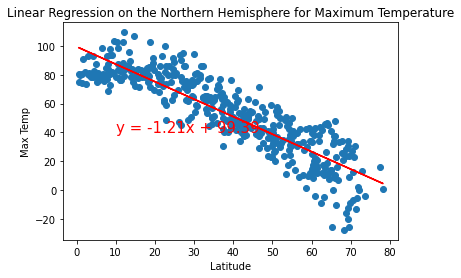

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

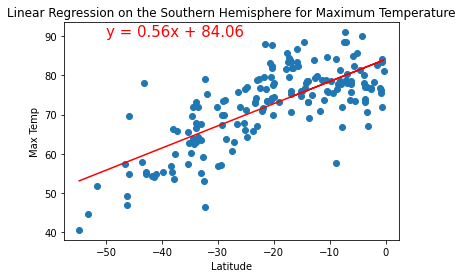

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

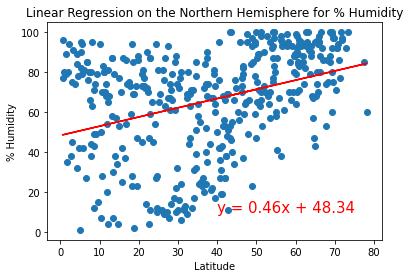

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

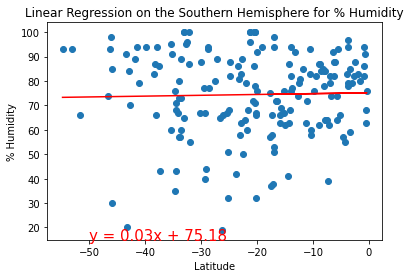

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

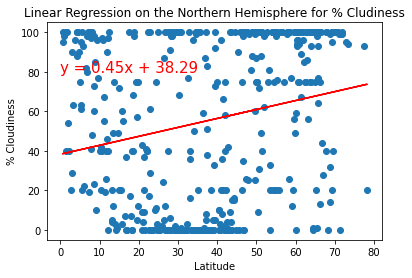

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cludiness', '% Cloudiness',(0,80))

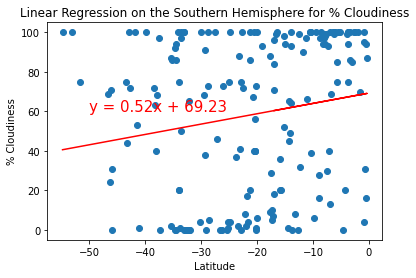

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

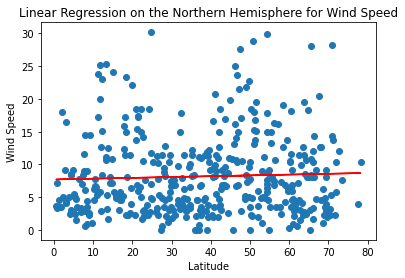

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

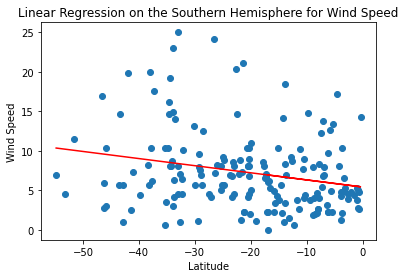

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))